In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
#loading images preprocessing images and image augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   rotation_range=50)

test_datagen = ImageDataGenerator(rescale=1/255)

train_dir = './big__data/rps/'
test_dir = './big__data/rps-test-set/'

train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size=30,
                                              target_size=(180, 180),
                                              class_mode='categorical')

test_gen = test_datagen.flow_from_directory(test_dir,
                                            batch_size=30,
                                            target_size=(180, 180),
                                            class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [3]:
#initializing model
model = Sequential([
    Conv2D(32, (3, 3),  activation='relu', input_shape=(180, 180, 3)),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3),  activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3),  activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3),  activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(0.4),
    Dense(250, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
    
])

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

In [4]:
model.fit(train_gen, epochs=10, steps_per_epoch=2520/30, validation_data=test_gen, validation_steps=372/30)

Epoch 1/10
84/84 [==============================] - 43s 517ms/step - loss: 1.1051 - accuracy: 0.3532 - val_loss: 1.0724 - val_accuracy: 0.3387
Epoch 2/10
84/84 [==============================] - 43s 514ms/step - loss: 1.0270 - accuracy: 0.4476 - val_loss: 0.7695 - val_accuracy: 0.7392
Epoch 3/10
84/84 [==============================] - 43s 512ms/step - loss: 0.8072 - accuracy: 0.6163 - val_loss: 0.3601 - val_accuracy: 0.8710
Epoch 4/10
84/84 [==============================] - 43s 507ms/step - loss: 0.6456 - accuracy: 0.7167 - val_loss: 0.4104 - val_accuracy: 0.8011
Epoch 5/10
84/84 [==============================] - 43s 515ms/step - loss: 0.5705 - accuracy: 0.7508 - val_loss: 0.3704 - val_accuracy: 0.8468
Epoch 6/10
84/84 [==============================] - 44s 529ms/step - loss: 0.4328 - accuracy: 0.8202 - val_loss: 0.2236 - val_accuracy: 0.9704
Epoch 7/10
84/84 [==============================] - 44s 520ms/step - loss: 0.4217 - accuracy: 0.8333 - val_loss: 0.4254 - val_accuracy: 0.7661

<function matplotlib.pyplot.show(*args, **kw)>

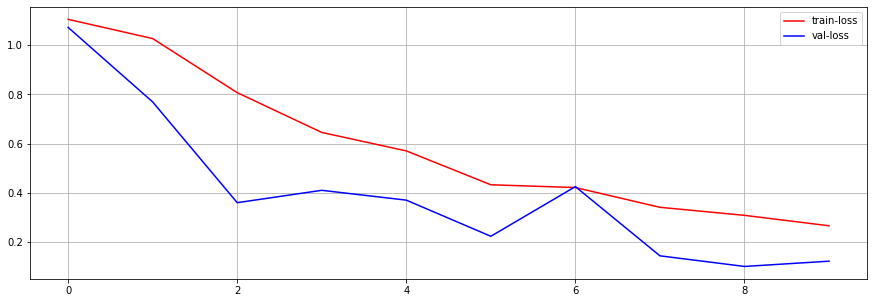

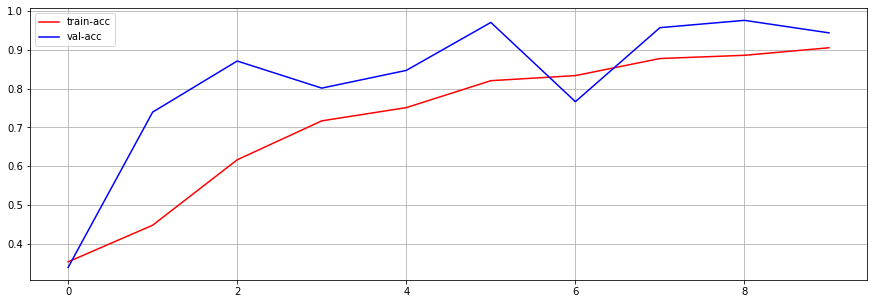

In [5]:
hist = model.history.history
loss = hist['loss']
val_loss = hist['val_loss']
acc = hist['accuracy']
val_acc = hist['val_accuracy']
epochs = list(range(len(loss)))

plt.figure(figsize=(15, 5))
plt.plot(epochs, loss, 'r', label='train-loss')
plt.plot(epochs, val_loss, 'b', label='val-loss')
plt.legend()
plt.grid()

plt.figure(figsize=(15, 5))

plt.plot(epochs, acc, 'r', label='train-acc')
plt.plot(epochs, val_acc, 'b', label='val-acc')
plt.legend()
plt.grid()
plt.show

In [6]:
import os
model.evaluate_generator(test_gen, verbose=1, steps=372/30)

Instructions for updating:
Please use Model.evaluate, which supports generators.
13/12 [===============================] - 1s 104ms/step - loss: 0.1120 - accuracy: 0.9435


[0.11199577152729034, 0.9435483813285828]

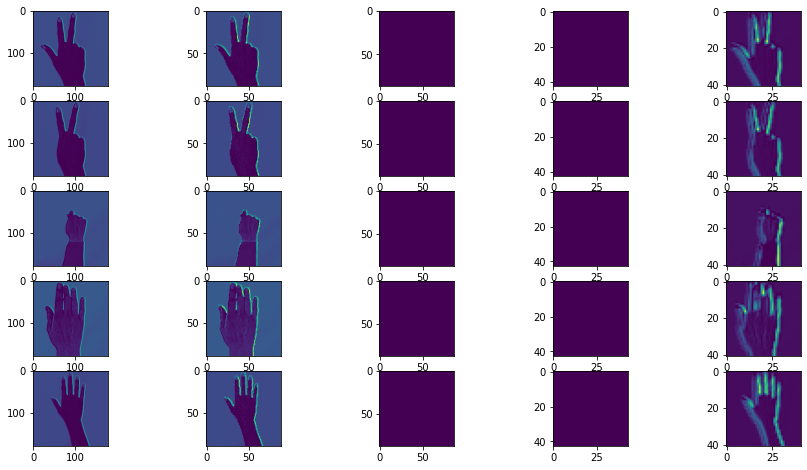

In [31]:
import random

validation_dir = './big__data/rps-validation/'
x = 5
y = 5
fig, ax = plt.subplots(x, y, figsize=(15, 8))
valid_list = os.listdir(validation_dir)
layers_output = [layer.output for layer in model.layers]
conv_model = tf.keras.models.Model(inputs=model.input, outputs=layers_output)

for i in range(x):
    img = image.load_img(validation_dir + random.choice(valid_list), target_size=(180, 180))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    convs = conv_model.predict(img)
    for j in range(y):
        ax[i, j].imshow(convs[j][0, :, :, 30])
